# Web Scraping

# Importar librerías

In [1]:
import requests
import math
from bs4 import BeautifulSoup
import time

# Función para construir el enlace principal de la búsqueda con tres parámetros:

1. Frase de búsqueda
2. Fecha inicial (opcional)
3. Fecha final (opcional)

In [2]:
def busqueda_ET(busqueda, f_inicial=None, f_final=None):
  """
  busqueda = cadena de búsqueda
  f_inicial = ej: 2021-04-28 (opcional)
  f_final = ej: 2021-05-10 (opcional)
  """
  host =  "https://www.eltiempo.com"
  query = "/buscar?q="
  fecha_inicial = "&publishedAt%5Bfrom%5D="
  fecha_final = "&publishedAt%5Buntil%5D="

  if f_inicial == None or f_final == None:
    return f"{host}{query}{busqueda}"
  else:
    return f"{host}{query}{busqueda}{fecha_inicial}{f_inicial}{fecha_final}{f_final}"


# Función base para construir la "sopa"

Básicamente, hacemos la petición (`requests`) al servidor y con esa petición la transformamos en un objeto `bs4`.  

In [3]:
def sopa_base(url):
  """
  url = cualquier dirección URL que pueda ser explorada
  """
  r = requests.get(url)
  c = r.content
  return BeautifulSoup(c, 'html.parser')

# Funciones para recuperar el listado total de enlaces resultado de una búsqueda

* `rango_ET(sopa)`: 
  ***sopa*** = Un objeto bs4 con la primera página de la búsqueda en El Tiempo.
  Usar la función busqueda_ET() para garantizar el objeto correcto.
  
  Regresa un número integral que representa el total de las páginas de la búsqueda.

* `hrefs(sopa)`:
  ***sopa*** = Un objeto bs4.

  Regresa una cadena con el `href` de los enlaces de cada título por página.

* `listado_urls_busqueda(url)`:
  ***url*** url resultado de la función busqueda_ET()

  Regresa un listado de enlaces bien formados por cada una de las páginas de búsqueda.


- listado_urls_busqueda() llama a una búsqueda completa. Por ejemplo: `busqueda_ET("Paro Nacional", "2021-04-28", "2021-05-10")`. También se puede pasar como parámetro una cadena como la siguiente: `https://www.eltiempo.com/buscar/1q=Paro%20Nacional&publishedAt%5Bfrom%5D=2021-04-28&publishedAt%5Buntil%5D=2021-05-10`


Ejemplo:

```python
url = busqueda_ET("Paro Nacional", "2021-04-28", "2021-05-10")

for l in listado_urls_busqueda(url):
  print(l)

---

https://www.eltiempo.com/cultura/cine-y-tv/carolina-ramirez-no-apoya-comision-de-la-esperanza-587422
https://www.eltiempo.com/deportes/futbol-internacional/copa-america-2021-en-jaque-por-orden-publico-en-colombia-587052
https://www.eltiempo.com/colombia/otras-ciudades/anuc-sucre-denuncia-que-a-campesinos-los-tienen-en-el-olvido-587398
https://www.eltiempo.com/cultura/gente/paro-nacional-como-apoyar-a-campesinos-con-productos-represados-587363
https://www.eltiempo.com/colombia/cali/paro-nacional-tiroteo-y-choques-entre-indigenas-y-vecinos-en-cali-587194

```


In [4]:
def rango_ET(sopa):
  """
  sopa = Un objeto bs4 con la primera página de la búsqueda en El Tiempo.
  ---
  Usar la función busqueda_ET() para garantizar el objeto correcto.
  """
  rango = sopa.find("div", class_="search-results-title")
  try:
    return math.ceil(int(rango.text.split()[2]) / 10) + 1
  except IndexError:
    print("sin resultados")


def hrefs(sopa):
  """
  sopa = un objeto bs4.
  """
  enlaces = sopa.find_all("a", class_="title page-link")
  return [e['href'] for e in enlaces]


def listado_urls_busqueda(url, x = None):
  """
  url = url resultado de la función busqueda_ET()
  x = cantidad de páginas por explorar (valor int)
  """
  p1 = url.split("?")[0]
  p2 = url.split("?")[1]

  paginas = [f"{p1}/{i}?{p2}" for i in range(1, rango_ET(sopa_base(url)))]

  hrefs_lista = []
  i = 0

  for p in paginas[:x]:
    i = i + 1
    print(f"página {i}")
    hrefs_lista.extend([f"https://www.eltiempo.com{h}" for h in hrefs(sopa_base(p))])
    time.sleep(1)
  
  return hrefs_lista
    

### Test

In [5]:
url = busqueda_ET("Paro Nacional", "2021-04-28", "2021-05-10")

listado_busqueda = listado_urls_busqueda(url, 1)

for l in listado_busqueda:
  print(l)

página 1
https://www.eltiempo.com/colombia/otras-ciudades/paro-nacional-10-mayo-en-vivo-ivan-duque-en-cali-y-jornada-de-protestas-587262
https://www.eltiempo.com/colombia/cali/paro-en-cali-amanece-entre-barricadas-y-patrullajes-587288
https://www.eltiempo.com/bogota/paro-nacional-en-bogota-investigan-si-joven-murio-tras-las-protestas-587482
https://www.eltiempo.com/opinion/columnistas/jose-manuel-acevedo/columna-sobre-las-personas-de-clase-baja-y-media-y-la-situacion-del-pais-587490
https://www.eltiempo.com/opinion/columnistas/miguelangel-epeeyui-lopez-h/pais-hechura-de-mano-columna-de-miguelangel-epeeyuei-lopez-h-587501
https://www.eltiempo.com/justicia/servicios/paro-nacional-fiscal-francisco-barbosa-se-reunion-con-su-equipo-en-cali-587526
https://www.eltiempo.com/justicia/investigacion/alcalde-de-zipaquira-sera-investigado-por-la-procuraduria-587375
https://www.eltiempo.com/colombia/cali/paro-10m-comisiones-de-paz-buscan-salidas-a-crisis-de-cali-587487
https://www.eltiempo.com/colom

## Clases para recuperar secciones específicas de los artículos

### Uso:

* Construir un objeto NotaPrincipal de la siguiente manera:

```python
url = "https://www.eltiempo.com//politica/gobierno/tras-reunion-con-duque-comite-nacional-del-paro-no-llega-a-acuerdo-58745"
articulo = NotaPrincipal(url)
```

* Llamar a uno de los métodos del objeto, por ejemplo:

```python
articulo.titulo()
```

Hay cuatro métodos para las cuatro partes principales del cuerpo del artículo:

* `titulo()`: Recupera el título del artículo.
* `epigrafe()`: Recupera el epígrafe del artículo.
* `texto`: Recupera el cuerpo (texto) del artículo.
* `etiquetas()`: Recupera el listado de etiquetas del artículo.





In [ ]:
class NotaPrincipal:
  def __init__(self, url):
    self.url = url

  def sopa_ppal(self):
    return sopa_base(self.url)

  def titulo(self):
    sopah = self.sopa_ppal().find_all("h1", class_="titulo")
    return sopah[0].get_text(strip=True)

  def epigrafe(self):
    sopae = self.sopa_ppal().find_all("p", class_="article-epigraph")
    return sopae[0].get_text(strip=True)

  def texto(self):
    sopap = self.sopa_ppal().find_all("p", class_="contenido")
    return [s.get_text(strip=True) for s in sopap]

  def etiquetas(self):
    sopa_div = self.sopa_ppal().find_all("div", class_="tags-en-articulo-links tag-related")
    return [rs.get_text(strip=True) for sd in sopa_div for rs in sd.find_all("h2")]

### Test

In [ ]:
for l in listado_busqueda:
  print(l)
  cuerpo = NotaPrincipal(l)
  print(cuerpo.etiquetas())

https://www.eltiempo.com/colombia/otras-ciudades/paro-nacional-10-mayo-en-vivo-ivan-duque-en-cali-y-jornada-de-protestas-587262
['Paro', 'Paro nacional', 'paro hoy 10 de mayo']
https://www.eltiempo.com/justicia/investigacion/paro-nacional-como-va-la-busqueda-de-desparecidos-587515
['Fiscalía General de la Nación', 'Desaparecidos', 'Defensoría del Pueblo', 'Paro 2021']
https://www.eltiempo.com/justicia/servicios/paro-nacional-fiscal-francisco-barbosa-se-reunion-con-su-equipo-en-cali-587526
['Fiscalía General de la Nación', 'paro nacional 2021', 'Paro 2021']
https://www.eltiempo.com/bogota/claudia-lopez-anuncia-nuevas-medidas-en-bogota-587525
['Claudia López', 'covid19', 'Pandemia en Bogotá', 'cuarentena bogota', 'Paro 2021']
https://www.eltiempo.com/colombia/cali/paro-en-cali-amanece-entre-barricadas-y-patrullajes-587288
['Presidente de Colombia', 'Bloqueo de vías', 'Jorge Ivan Ospina', 'Alcalde de Cali', 'Paro 2021']
https://www.eltiempo.com/justicia/investigacion/alcalde-de-zipaquira-

# Ejemplos de uso

## Nube de palabras con las etiquetas de los artículos

1. Recuperar las etiquetas de los artículos del 28 de abril al 11 de mayo de 2021 con la búsqueda "paro nacional".

Este proceso realiza una búsqueda por >600 páginas, por lo que puede tardar más de 15 minutos en ejecutarse completamente.

In [ ]:
url = busqueda_ET("Paro Nacional", "2021-04-28", "2021-05-11")

etiquetas = []
i = 0
for l in listado_urls_busqueda(url):
  cuerpo = NotaPrincipal(l)
  etiquetas.extend(cuerpo.etiquetas())
  i = i + 1
  print(f"añadida lista de etiquetas {i}")
  time.sleep(2)

etiquetas

página 1
página 2
página 3
página 4
página 5
página 6
página 7
página 8
página 9
página 10
página 11
página 12
página 13
página 14
página 15
página 16
página 17
página 18
página 19
página 20
página 21
página 22
página 23
página 24
página 25
página 26
página 27
página 28
página 29
página 30
página 31
página 32
página 33
página 34
página 35
página 36
página 37
página 38
página 39
página 40
página 41
página 42
página 43
página 44
página 45
página 46
página 47
página 48
página 49
página 50
página 51
página 52
página 53
página 54
página 55
página 56
página 57
página 58
página 59
página 60
página 61
página 62
página 63
añadida lista de etiquetas 1
añadida lista de etiquetas 2
añadida lista de etiquetas 3
añadida lista de etiquetas 4
añadida lista de etiquetas 5
añadida lista de etiquetas 6
añadida lista de etiquetas 7
añadida lista de etiquetas 8
añadida lista de etiquetas 9
añadida lista de etiquetas 10
añadida lista de etiquetas 11
añadida lista de etiquetas 12
añadida lista de etiquetas 1

['Paro',
 'Paro nacional',
 'paro hoy 10 de mayo',
 'Fiscalía General de la Nación',
 'Desaparecidos',
 'Defensoría del Pueblo',
 'Paro 2021',
 'Fiscalía General de la Nación',
 'paro nacional 2021',
 'Paro 2021',
 'Claudia López',
 'covid19',
 'Pandemia en Bogotá',
 'cuarentena bogota',
 'Paro 2021',
 'Presidente de Colombia',
 'Bloqueo de vías',
 'Jorge Ivan Ospina',
 'Alcalde de Cali',
 'Paro 2021',
 'Procuraduría General de la Nación',
 'Investigación',
 'Zipaquirá',
 'Paro 2021',
 'Bloqueos en Cundinamarca',
 'Colombia',
 'Marchas',
 'Paro nacional',
 'Iván Duque',
 'Movilizaciones',
 'Muerto',
 'Paro nacional',
 'Alcaldía Bogotá',
 'joven',
 'Protestas Bogotá',
 'Cali',
 'Valle del Cauca',
 'Congreso de Colombia',
 'Paro 2021',
 'Elizabeth Loaiza',
 'noticias et',
 'más noticias',
 'contenidoliberado',
 'Contenidolibre',
 'Universidad del Valle',
 'Heridos',
 'Indígenas del Cauca',
 'Minga indígena',
 'Paro 2021',
 'Bogotá',
 'Claudia López',
 'pandemia',
 'covid',
 'pico y cedul

2. Importamos las librerías necesarias para nuestro ejercicio

In [ ]:
import matplotlib.pyplot as plt
import imageio
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


3. Construimos la nube de palabras

(-0.5, 2286.5, 1322.5, -0.5)

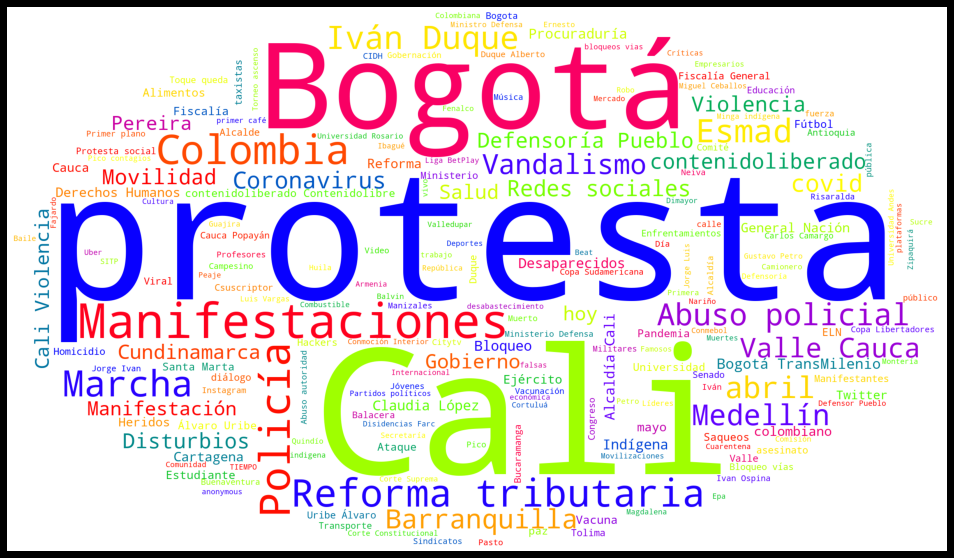

In [ ]:
palabrasv = stopwords.words('spanish')
palabrasv.extend(["et", "noticias"])
palabrasv.extend(["paro", "nacional"])

mask_image = imageio.imread("https://github.com/pdeitel/IntroToPython/raw/master/examples/ch12/mask_oval.png")

wordcloud = WordCloud(colormap='prism', background_color='white', mask=mask_image, 
                      stopwords=palabrasv, width = 1000, height = 500).generate(" ".join(etiquetas))
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")

## Palabras más frecuentes en el cuerpo del texto de los artículo

In [ ]:
url = busqueda_ET("protesta", "2021-05-05", "2021-05-11")

ctexto = []
i = 0
for l in listado_urls_busqueda(url):
  cuerpo = NotaPrincipal(l)
  ctexto.extend(cuerpo.texto())
  i = i + 1
  print(f"añadido cuerpo del texto # {i}")
  time.sleep(2)

# ctexto

página 1
página 2
página 3
página 4
página 5
página 6
página 7
página 8
página 9
página 10
página 11
página 12
página 13
página 14
página 15
página 16
página 17
página 18
página 19
página 20
página 21
página 22
página 23
añadido cuerpo del texto # 1
añadido cuerpo del texto # 2
añadido cuerpo del texto # 3
añadido cuerpo del texto # 4
añadido cuerpo del texto # 5
añadido cuerpo del texto # 6
añadido cuerpo del texto # 7
añadido cuerpo del texto # 8
añadido cuerpo del texto # 9
añadido cuerpo del texto # 10
añadido cuerpo del texto # 11
añadido cuerpo del texto # 12
añadido cuerpo del texto # 13
añadido cuerpo del texto # 14
añadido cuerpo del texto # 15
añadido cuerpo del texto # 16
añadido cuerpo del texto # 17
añadido cuerpo del texto # 18
añadido cuerpo del texto # 19
añadido cuerpo del texto # 20
añadido cuerpo del texto # 21
añadido cuerpo del texto # 22
añadido cuerpo del texto # 23
añadido cuerpo del texto # 24
añadido cuerpo del texto # 25
añadido cuerpo del texto # 26
añadido 

['Optimista. Así se declaró el Gobierno Nacional al término de la primera reunión con el Comité Nacional del Paro, realizada ayer en la casa de Nariño, en procura de lograr un acuerdo que ponga fin a las protestas en el país que han incluido muertes, denuncias de violación de los derechos humanos y bloqueos de vías que están generando desabastecimientos en algunas ciudades.',
 'Y si bien no hubo ningún punto de acuerdo, es claro que se trató de una primera reunión que tenía fundamentalmente unos propósitos exploratorios para ver qué se podía hacer.Por eso, en el marco del encuentro,monseñor Héctor Fabio Henao, delegado de la Conferencia Episcopal, destacó en más de una ocasión la importancia de ese primer encuentro.La reunión comenzó pasadas las 12:30 de la tarde con la presencia de los delegados del comité del paro –entre los que había dirigentes sindicales de diversas organizaciones– y se terminó casi sobre las 4 de la tarde.El presidente Iván Duque, tras saludar a varios de ellos de

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


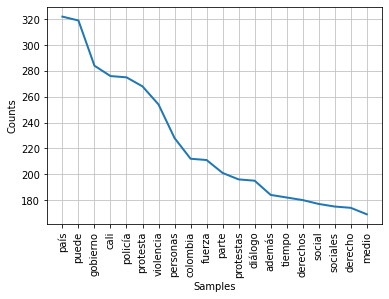

In [ ]:
nltk.download('punkt')
from nltk import word_tokenize
from nltk.probability import FreqDist

palabrasv.extend(["si", "app", "lee"])
texto = " ".join(ctexto)
palabras = word_tokenize(texto,"spanish")
palabras_nopunct = [p.lower() for p in palabras if p.isalpha()]
texto_limpio = [p for p in palabras_nopunct if p not in palabrasv]
fre = FreqDist(texto_limpio)
fre.most_common(20)
fre.plot(20)

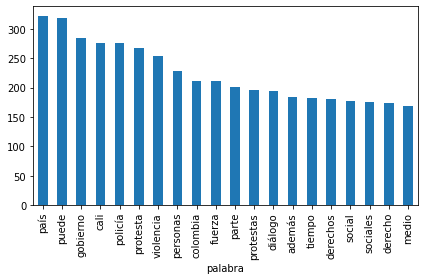

In [ ]:
import pandas as pd

df = pd.DataFrame(fre.most_common(20), columns=["palabra", "frecuencia"])

axes = df.plot.bar(x="palabra", y="frecuencia", legend=False)

plt.gcf().tight_layout()

In [ ]:
import plotly.express as px

fig = px.bar(df, x="palabra", y="frecuencia", hover_data=['palabra', 'frecuencia'], color='frecuencia')
fig.show()

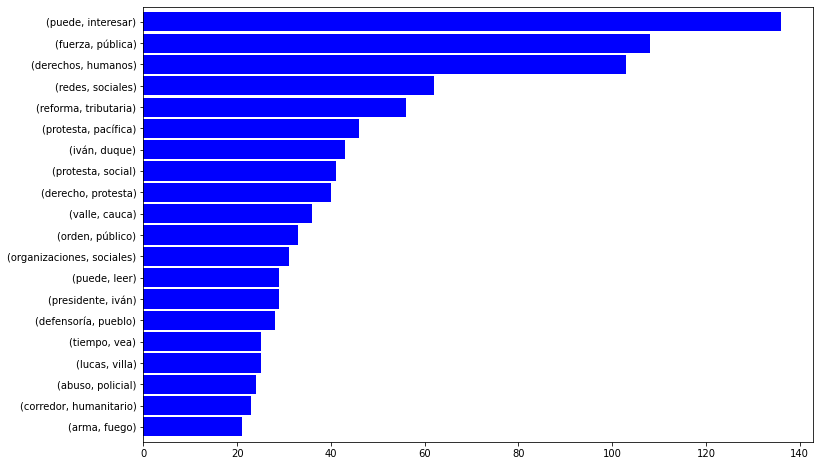

In [ ]:
bigrama = pd.Series(nltk.ngrams(texto_limpio, 2)).value_counts()[:20]
bigrama.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
